In [1]:
import glob
import pandas as pd
import numpy as np
import torch
from google.colab import drive
from sklearn.model_selection import train_test_split
import math
from statistics import mean
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
drive.mount('/content/drive')

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Tumor

In [14]:
df_tumor_1 = pd.read_csv('/content/drive/MyDrive/lung/lung_tumor_1_coding.csv')
df_tumor_1

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,3.486740,-9.965784,5.172844,1.602267,2.895497,2.559272,2.707149,3.671350,2.969547,2.785697,...,-9.965784,-6.717857,-1.311148,-9.965784,-9.965784,-9.965784,-9.965784,-8.532825,-2.334971,1
1,3.563549,-9.965784,5.505129,0.720629,1.305737,3.598722,3.788393,3.856219,3.300753,3.142332,...,-9.965784,-9.965784,-1.479553,-9.965784,-9.965784,-9.965784,-9.965784,-5.869860,-2.107182,1
2,3.414636,-9.965784,4.876036,0.443076,0.660746,-0.314912,0.776188,3.013444,5.734376,3.168385,...,-9.965784,-7.333516,-1.372206,-9.965784,-9.965784,-9.965784,-9.965784,-8.333516,-0.057392,1
3,4.024515,-3.910502,4.125254,1.106549,-0.166341,2.647752,4.162838,4.337154,1.217479,3.487358,...,-9.965784,-9.965784,-1.236843,-3.480357,-9.965784,-9.965784,-9.965784,-7.861448,-2.114035,1
4,4.169003,-1.840629,4.531756,2.968423,2.185549,2.645448,4.612323,3.733170,2.015783,3.846644,...,-9.965784,-6.049308,-3.286304,-9.965784,-9.965784,-9.965784,-9.965784,-4.832385,-2.347399,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,3.145254,-9.965784,6.301474,1.506500,2.677914,2.449403,3.445303,5.412324,2.358621,3.361853,...,-9.965784,-7.039785,-1.560217,-9.965784,-9.965784,-9.965784,-9.965784,-6.795859,-3.687800,1
786,2.903231,-9.965784,4.858289,1.243425,0.823586,2.041523,3.680358,4.943753,6.735640,3.864315,...,-9.965784,-6.844769,-4.594225,-9.965784,-9.965784,-9.965784,-9.965784,-5.665661,-1.280335,1
787,3.352674,-9.965784,4.714559,0.845751,0.248535,3.338895,4.015060,4.427633,0.664574,3.323817,...,-9.965784,-9.965784,0.236952,-9.965784,-9.965784,-9.965784,-9.965784,-5.921390,-2.751465,1
788,3.166426,-4.559792,5.055204,1.541862,1.183455,1.795808,1.982583,4.856777,4.251734,3.408236,...,-9.965784,-9.965784,-1.970300,-5.107803,-9.965784,-9.965784,-9.965784,-6.429731,-1.361416,1


In [15]:
df_tumor_2 = pd.read_csv('/content/drive/MyDrive/lung/lung_tumor_2_coding.csv')
df_tumor_2

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,2.353126,-0.283141,4.345361,2.874482,1.831391,2.604024,3.878627,3.251977,4.392372,4.089091,...,-9.965784,-5.615287,-4.265345,-9.965784,-9.965784,-9.965784,-9.965784,-4.155855,-1.881507,1
1,4.111282,-1.049905,4.319343,2.489414,1.172167,2.391245,4.892877,3.775588,1.486611,4.137667,...,-9.965784,-4.779918,-2.834442,-2.973696,-9.965784,-9.965784,-9.965784,-4.290533,-1.604718,1
2,2.943715,-2.706512,4.457456,2.455728,1.304044,2.468557,4.002162,3.890923,1.172872,3.354339,...,-9.965784,-6.764150,-4.496549,-9.965784,-9.965784,-9.965784,-9.965784,-6.127841,-3.373327,1
3,3.184820,-3.236503,4.534354,1.584289,1.332221,2.747967,4.243677,2.878058,6.511321,3.134550,...,-9.965784,-3.851001,-4.039785,-9.965784,-9.965784,-7.243318,-9.965784,-5.526161,-1.654717,1
4,4.399151,-4.787866,4.936007,1.713256,1.590051,2.649202,2.293076,3.720880,7.084592,3.133580,...,-9.965784,-9.965784,-1.309359,-9.965784,-9.965784,-9.965784,-9.965784,-5.861448,-1.427013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,2.827352,-5.828281,5.458950,1.390503,0.803310,4.568956,2.757237,4.013864,1.944746,2.920122,...,-9.965784,-7.097888,-2.216250,-9.965784,-9.965784,-7.137965,-9.965784,-5.733124,-2.771027,1
785,4.919159,-9.965784,4.806401,2.202700,1.007985,3.487654,3.856030,4.175245,5.274038,3.057883,...,-9.965784,-9.965784,-1.325178,-9.965784,-9.965784,-9.965784,-9.965784,-6.058894,-2.636661,1
786,3.948292,-6.546245,3.840856,2.528996,0.847356,1.855153,3.846664,4.708220,3.621478,3.499068,...,-9.965784,-9.965784,-6.559792,-3.654717,-9.965784,-9.965784,-9.965784,-5.853084,-3.282088,1
787,2.632873,-6.615287,4.549663,0.432425,0.505078,0.986957,3.707955,3.901485,-1.422366,2.786805,...,-9.965784,-9.965784,-2.513749,-9.965784,-9.965784,-7.002310,-9.965784,-8.702750,-2.085589,1


In [16]:
df_tumor = pd.concat([df_tumor_1, df_tumor_2], axis=0, ignore_index=True)
df_tumor

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,3.486740,-9.965784,5.172844,1.602267,2.895497,2.559272,2.707149,3.671350,2.969547,2.785697,...,-9.965784,-6.717857,-1.311148,-9.965784,-9.965784,-9.965784,-9.965784,-8.532825,-2.334971,1
1,3.563549,-9.965784,5.505129,0.720629,1.305737,3.598722,3.788393,3.856219,3.300753,3.142332,...,-9.965784,-9.965784,-1.479553,-9.965784,-9.965784,-9.965784,-9.965784,-5.869860,-2.107182,1
2,3.414636,-9.965784,4.876036,0.443076,0.660746,-0.314912,0.776188,3.013444,5.734376,3.168385,...,-9.965784,-7.333516,-1.372206,-9.965784,-9.965784,-9.965784,-9.965784,-8.333516,-0.057392,1
3,4.024515,-3.910502,4.125254,1.106549,-0.166341,2.647752,4.162838,4.337154,1.217479,3.487358,...,-9.965784,-9.965784,-1.236843,-3.480357,-9.965784,-9.965784,-9.965784,-7.861448,-2.114035,1
4,4.169003,-1.840629,4.531756,2.968423,2.185549,2.645448,4.612323,3.733170,2.015783,3.846644,...,-9.965784,-6.049308,-3.286304,-9.965784,-9.965784,-9.965784,-9.965784,-4.832385,-2.347399,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,2.827352,-5.828281,5.458950,1.390503,0.803310,4.568956,2.757237,4.013864,1.944746,2.920122,...,-9.965784,-7.097888,-2.216250,-9.965784,-9.965784,-7.137965,-9.965784,-5.733124,-2.771027,1
1575,4.919159,-9.965784,4.806401,2.202700,1.007985,3.487654,3.856030,4.175245,5.274038,3.057883,...,-9.965784,-9.965784,-1.325178,-9.965784,-9.965784,-9.965784,-9.965784,-6.058894,-2.636661,1
1576,3.948292,-6.546245,3.840856,2.528996,0.847356,1.855153,3.846664,4.708220,3.621478,3.499068,...,-9.965784,-9.965784,-6.559792,-3.654717,-9.965784,-9.965784,-9.965784,-5.853084,-3.282088,1
1577,2.632873,-6.615287,4.549663,0.432425,0.505078,0.986957,3.707955,3.901485,-1.422366,2.786805,...,-9.965784,-9.965784,-2.513749,-9.965784,-9.965784,-7.002310,-9.965784,-8.702750,-2.085589,1


In [17]:
X = df_tumor.drop('tumor', axis=1)

In [28]:
X_tumor = X

In [18]:
threshold_edge = 0.8

#Normal

In [29]:
df_normal = pd.read_csv('/content/drive/MyDrive/lung/lung_normal_coding.csv')
df_normal

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,4.339558,-5.127841,4.542147,1.132050,-1.118414,4.291780,3.587077,3.684662,2.316754,2.736194,...,-9.965784,-7.795859,-3.432844,-3.723563,-9.965784,-9.965784,-9.965784,-6.049308,-3.927963,0
1,2.659377,-1.934566,4.511342,1.998593,0.231924,4.348551,4.722335,3.390255,2.124857,3.329023,...,-9.965784,-5.493297,-4.143054,-9.965784,-9.965784,-9.965784,-9.965784,-4.608232,-2.923578,0
2,2.379344,-5.227016,4.282173,1.180339,-0.991370,4.410660,4.010923,3.905928,1.100843,2.780226,...,-9.965784,-9.965784,-3.685942,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-3.453241,0
3,2.413377,-2.344465,4.582514,1.694212,0.110898,4.298284,4.774023,3.393567,1.303810,3.102524,...,-9.965784,-7.020926,-3.631288,-4.748554,-9.965784,-9.965784,-9.965784,-5.844769,-4.383831,0
4,2.357214,-3.578629,4.474137,1.192005,-0.742024,4.991272,5.105070,3.827270,1.954382,2.856946,...,-9.965784,-9.965784,-3.585540,-9.965784,-9.965784,-5.293359,-9.965784,-6.493297,-3.283492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2.741855,-3.582080,4.487744,2.227464,0.619929,4.408603,3.924242,3.727376,2.603312,3.131096,...,-9.965784,-5.351074,-3.269512,-2.568324,-9.965784,-6.861448,-9.965784,-4.030325,-3.187050,0
418,2.905447,-2.944527,4.775999,2.173863,0.614286,3.906843,5.260786,3.542456,1.790105,3.017726,...,-9.965784,-6.532825,-4.662004,-9.965784,-9.965784,-9.965784,-9.965784,-3.791857,-3.129103,0
419,2.286112,-3.334971,4.482906,1.199625,-0.432844,4.743537,5.973593,4.443898,1.535804,2.917031,...,-9.965784,-6.601212,-0.509225,-9.965784,-9.965784,-9.965784,-9.965784,-5.293359,-3.519528,0
420,2.502203,-1.708396,4.277464,1.931986,0.525868,4.049622,4.844978,3.213938,1.471708,3.064745,...,-9.965784,-9.965784,-6.200250,-9.965784,-9.965784,-9.965784,-9.965784,-4.643856,-2.888969,0


In [30]:
X = df_normal.drop('tumor', axis=1)

In [31]:
X_normal = X

In [32]:
threshold_edge = 0.9

#LOAD LINKS

In [ ]:
links = pd.read_csv('/content/drive/MyDrive/lung/link_index.csv').drop('Unnamed: 0', axis=1)
links

,index1,score,index
0,1,241,0
1,57,186,0
2,75,163,0
3,109,196,0
4,118,248,0
...,...,...,...
13479485,19538,188,19952
13479486,19540,222,19952
13479487,19565,152,19952
13479488,19904,204,19952


In [ ]:
edge_index = torch.tensor([links['index'],links['index1']])
edge_index.shape

torch.Size([2, 13479490])

In [ ]:
edge_index

tensor([[    0,     0,     0,  ..., 19952, 19952, 19952],
        [    1,    57,    75,  ..., 19565, 19904, 19907]])

#TRAINING EXPRESSED/NOT EXPRESSED GENES

In [ ]:
X = X.transpose()

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,412,413,414,415,416,417,418,419,420,421
ENSG00000000003.15,4.339558,2.659377,2.379344,2.413377,2.357214,2.788414,2.546215,2.788519,2.782975,2.993221,...,2.771167,2.410043,2.505688,2.072483,2.073957,2.741855,2.905447,2.286112,2.502203,2.204704
ENSG00000000005.6,-5.127841,-1.934566,-5.227016,-2.344465,-3.578629,-1.655172,-1.902929,-2.779918,-3.031504,-0.926865,...,-1.306145,-3.459576,-2.498994,-4.023270,-5.194955,-3.582080,-2.944527,-3.334971,-1.708396,-3.110293
ENSG00000000419.13,4.542147,4.511342,4.282173,4.582514,4.474137,4.006917,4.312868,4.665722,4.256611,4.495785,...,4.454683,4.728405,4.475623,4.080112,4.359367,4.487744,4.775999,4.482906,4.277464,4.384478
ENSG00000000457.14,1.132050,1.998593,1.180339,1.694212,1.192005,2.005580,2.174566,1.888811,0.815411,1.862154,...,1.832120,1.635987,1.515460,2.322822,0.219215,2.227464,2.173863,1.199625,1.931986,2.185708
ENSG00000000460.17,-1.118414,0.231924,-0.991370,0.110898,-0.742024,0.311387,0.667120,0.526970,-0.979942,0.366924,...,0.633943,-0.072938,0.115300,0.795434,-1.186722,0.619929,0.614286,-0.432844,0.525868,0.534261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288661.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784
ENSG00000288669.1,-9.965784,-9.965784,-9.965784,-9.965784,-5.293359,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-6.748554,-6.930160,-6.878321,-9.965784,-6.861448,-9.965784,-9.965784,-9.965784,-9.965784
ENSG00000288671.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784
ENSG00000288674.1,-6.049308,-4.608232,-9.965784,-5.844769,-6.493297,-4.853084,-3.880445,-4.680382,-4.710284,-4.095420,...,-4.970300,-4.684086,-4.351074,-4.221623,-6.254289,-4.030325,-3.791857,-5.293359,-4.643856,-5.748554


In [ ]:
X.shape

(19962, 422)

In [ ]:
correlation_matrix = np.corrcoef(X)
print("CORR_MATRIX shape: ", correlation_matrix.shape)

CORR_MATRIX shape:  (19962, 19962)


In [ ]:
print(correlation_matrix)

[[ 1.00000000e+00 -4.10431980e-02  6.70250516e-01 ...  2.50160802e-16
  -2.58029076e-02  3.04788037e-01]
 [-4.10431980e-02  1.00000000e+00 -9.19134527e-02 ... -8.56727508e-17
   3.34572079e-01 -1.87441694e-01]
 [ 6.70250516e-01 -9.19134527e-02  1.00000000e+00 ... -7.00730570e-17
  -6.76138285e-02  2.54390288e-01]
 ...
 [ 2.50160802e-16 -8.56727508e-17 -7.00730570e-17 ...  1.00000000e+00
  -2.28374068e-16  6.03779911e-17]
 [-2.58029076e-02  3.34572079e-01 -6.76138285e-02 ... -2.28374068e-16
   1.00000000e+00  9.37930075e-02]
 [ 3.04788037e-01 -1.87441694e-01  2.54390288e-01 ...  6.03779911e-17
   9.37930075e-02  1.00000000e+00]]


In [ ]:
#BUILD EDGE INDEX
thresh = 0.2

while True:
  mask = correlation_matrix >= thresh

  # Exclude the diagonal elements (assuming the matrix is square)
  np.fill_diagonal(mask, False)

  # Get the row and column indices where the mask is True
  row_indices, col_indices = np.where(mask)

  print("LEN: ", len(set(row_indices)))
  if len(set(row_indices)) == X.shape[0]:
    break

  print(thresh)
  thresh -= 0.05

# Create the edge_index tensor
edge_index = torch.tensor([row_indices, col_indices], dtype=torch.int64)

print(edge_index.shape)

LEN:  19868
0.2
LEN:  19936
0.15000000000000002
LEN:  19959
0.10000000000000002
LEN:  19962
torch.Size([2, 183427458])


<ipython-input-13-327dda625df1>:21: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  edge_index = torch.tensor([row_indices, col_indices], dtype=torch.int64)


In [ ]:
thresh

0.05000000000000002

#LOUVAIN

In [ ]:
!pip install python-louvain

In [ ]:
edge_numpy = edge_index.numpy()
edges = list(zip(edge_numpy[0], edge_numpy[1]))

In [ ]:
import networkx as nx
import community.community_louvain as community_louvain # python-louvain library

# Create a sample graph with edge indexes
#edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (4, 6), (5, 6)]
G = nx.Graph(edges)

# Compute the communities using the Louvain algorithm
partition = community_louvain.best_partition(G)
print(len(set(partition.values())))
#partition = community_louvain.best_partition(partition)

# Print the communities
print("Node: Community")

for node, community_id in partition.items():
    print(f"{node}: {community_id}")

Output streaming troncato alle ultime 5000 righe.
2087: 5
2441: 2
2824: 3
3335: 3
3923: 3
5940: 1
6263: 5
6297: 2
6478: 1
7110: 3
7394: 2
7711: 5
7969: 3
8169: 0
8349: 4
8950: 5
9340: 4
9352: 3
11397: 2
11709: 4
12003: 5
13347: 2
14521: 0
14730: 1
15298: 1
17786: 1
474: 2
624: 3
758: 1
1433: 1
2138: 0
2735: 3
2814: 3
2887: 2
2987: 3
3171: 4
3417: 2
3950: 3
4476: 4
4772: 3
5555: 3
5784: 3
5849: 3
5895: 1
5907: 2
6539: 3
6642: 5
7384: 3
7701: 2
8124: 3
8446: 3
8625: 1
8628: 2
9075: 1
9089: 5
9215: 0
9383: 5
9504: 3
10179: 5
10244: 1
10726: 3
10910: 5
11100: 3
11110: 3
11211: 3
12000: 5
14268: 1
14328: 3
14863: 5
15007: 3
15207: 5
15851: 2
16085: 5
16778: 5
16830: 3
17747: 5
18829: 4
19465: 3
437: 3
1541: 5
1701: 1
2026: 3
3476: 1
3510: 3
3561: 1
3642: 0
3696: 4
3793: 1
3990: 3
4382: 3
4568: 1
4937: 0
4941: 2
5031: 2
5170: 1
5206: 1
5643: 2
5676: 1
6022: 0
6206: 1
6221: 1
6311: 2
6591: 1
6823: 0
6855: 0
6860: 0
6861: 0
6915: 5
6981: 0
6989: 1
7103: 5
7112: 3
7285: 1
7502: 5
8579: 1
8657: 

In [ ]:
print(len(set(partition.values())))

6


In [ ]:
import csv

with open("partition.csv", "w", newline="") as fp:
    # Create a writer object
    writer = csv.DictWriter(fp, fieldnames=partition.keys())

    # Write the header row
    writer.writeheader()

    # Write the data rows
    writer.writerow(partition)
    print('Done writing dict to a csv file')

Done writing dict to a csv file


In [ ]:
a = pd.read_csv('partition.csv', sep=',').transpose()
a = a.reset_index(drop=False).rename(columns={'index': 'node', 0: 'community'})
a.to_csv('/content/drive/MyDrive/lung/louvain_complete.csv', index=False)

In [5]:
b = pd.read_csv('/content/drive/MyDrive/lung/louvain_complete.csv', sep=',')
b

,node,community
0,0,0
1,1,0
2,57,1
3,75,2
4,109,0
...,...,...
19197,18047,5
19198,19816,1
19199,17466,0
19200,17959,0


In [ ]:
b['community'].value_counts()

0    4057
3    3447
5    3170
1    3120
2    3013
4    2395
Name: community, dtype: int64

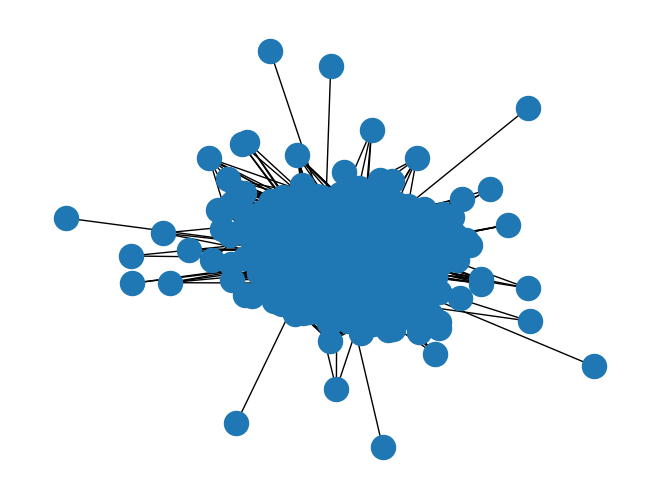

In [ ]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G, seed=225)  # Seed for reproducible layout
nx.draw(G, pos)
plt.show()

#SPECTRAL CLUSTERING

In [5]:
b = pd.read_csv('/content/drive/MyDrive/lung/louvain_complete.csv', sep=',')
b

,node,community
0,0,0
1,1,0
2,57,1
3,75,2
4,109,0
...,...,...
19197,18047,5
19198,19816,1
19199,17466,0
19200,17959,0


In [33]:
x_normal = X_normal.transpose()
x_normal['node'] = [i for i in range(X_normal.shape[1])]
x_normal

,0,1,2,3,4,5,6,7,8,9,...,413,414,415,416,417,418,419,420,421,node
ENSG00000000003.15,4.339558,2.659377,2.379344,2.413377,2.357214,2.788414,2.546215,2.788519,2.782975,2.993221,...,2.410043,2.505688,2.072483,2.073957,2.741855,2.905447,2.286112,2.502203,2.204704,0
ENSG00000000005.6,-5.127841,-1.934566,-5.227016,-2.344465,-3.578629,-1.655172,-1.902929,-2.779918,-3.031504,-0.926865,...,-3.459576,-2.498994,-4.023270,-5.194955,-3.582080,-2.944527,-3.334971,-1.708396,-3.110293,1
ENSG00000000419.13,4.542147,4.511342,4.282173,4.582514,4.474137,4.006917,4.312868,4.665722,4.256611,4.495785,...,4.728405,4.475623,4.080112,4.359367,4.487744,4.775999,4.482906,4.277464,4.384478,2
ENSG00000000457.14,1.132050,1.998593,1.180339,1.694212,1.192005,2.005580,2.174566,1.888811,0.815411,1.862154,...,1.635987,1.515460,2.322822,0.219215,2.227464,2.173863,1.199625,1.931986,2.185708,3
ENSG00000000460.17,-1.118414,0.231924,-0.991370,0.110898,-0.742024,0.311387,0.667120,0.526970,-0.979942,0.366924,...,-0.072938,0.115300,0.795434,-1.186722,0.619929,0.614286,-0.432844,0.525868,0.534261,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288661.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,19957
ENSG00000288669.1,-9.965784,-9.965784,-9.965784,-9.965784,-5.293359,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-6.748554,-6.930160,-6.878321,-9.965784,-6.861448,-9.965784,-9.965784,-9.965784,-9.965784,19958
ENSG00000288671.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,19959
ENSG00000288674.1,-6.049308,-4.608232,-9.965784,-5.844769,-6.493297,-4.853084,-3.880445,-4.680382,-4.710284,-4.095420,...,-4.684086,-4.351074,-4.221623,-6.254289,-4.030325,-3.791857,-5.293359,-4.643856,-5.748554,19960


In [34]:
x_tumor = X_tumor.transpose()
x_tumor['node'] = [i for i in range(X_tumor.shape[1])]
x_tumor

,0,1,2,3,4,5,6,7,8,9,...,1570,1571,1572,1573,1574,1575,1576,1577,1578,node
ENSG00000000003.15,3.486740,3.563549,3.414636,4.024515,4.169003,4.474890,3.841430,3.782503,4.544479,5.465037,...,3.997636,3.122341,3.150738,3.770597,2.827352,4.919159,3.948292,2.632873,3.127155,0
ENSG00000000005.6,-9.965784,-9.965784,-9.965784,-3.910502,-1.840629,-5.287712,-2.142417,-9.965784,-6.748554,-3.945638,...,-4.536168,-9.965784,-1.857260,-2.173319,-5.828281,-9.965784,-6.546245,-6.615287,-9.965784,1
ENSG00000000419.13,5.172844,5.505129,4.876036,4.125254,4.531756,5.085820,4.541434,4.415468,4.994652,5.753048,...,4.802736,5.170674,4.460494,4.490936,5.458950,4.806401,3.840856,4.549663,4.916997,2
ENSG00000000457.14,1.602267,0.720629,0.443076,1.106549,2.968423,1.823505,1.943509,1.143785,1.603264,0.981633,...,1.247502,1.433974,2.390998,2.278788,1.390503,2.202700,2.528996,0.432425,1.650581,3
ENSG00000000460.17,2.895497,1.305737,0.660746,-0.166341,2.185549,0.072037,0.863146,-0.531782,1.125783,1.988157,...,0.612494,1.109494,2.036152,1.112433,0.803310,1.007985,0.847356,0.505078,1.350158,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288661.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,19957
ENSG00000288669.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-5.710284,-6.828281,-9.965784,-7.137965,-9.965784,-9.965784,-7.002310,-9.965784,19958
ENSG00000288671.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,19959
ENSG00000288674.1,-8.532825,-5.869860,-8.333516,-7.861448,-4.832385,-6.345198,-4.811979,-4.891108,-5.553003,-6.088040,...,-7.058894,-5.965784,-4.768076,-5.339345,-5.733124,-6.058894,-5.853084,-8.702750,-7.058894,19960


In [35]:
join_normal = b.set_index('node').join(x_normal.set_index('node'), how='inner')
join_normal

,community,0,1,2,3,4,5,6,7,8,...,412,413,414,415,416,417,418,419,420,421
node,,,,,,,,,,,,,,,,,,,,,
0,0,4.339558,2.659377,2.379344,2.413377,2.357214,2.788414,2.546215,2.788519,2.782975,...,2.771167,2.410043,2.505688,2.072483,2.073957,2.741855,2.905447,2.286112,2.502203,2.204704
1,0,-5.127841,-1.934566,-5.227016,-2.344465,-3.578629,-1.655172,-1.902929,-2.779918,-3.031504,...,-1.306145,-3.459576,-2.498994,-4.023270,-5.194955,-3.582080,-2.944527,-3.334971,-1.708396,-3.110293
57,1,2.574828,-1.213571,3.086597,-1.224317,3.467071,1.074574,-0.419855,-2.354759,3.179623,...,-1.850480,1.195096,0.757621,0.189287,2.867560,0.445197,-1.328073,2.324580,-0.712646,-1.856737
75,2,6.478330,6.201934,6.875544,6.074426,6.814782,5.485649,5.972906,6.053863,7.141119,...,5.954441,6.040954,6.124740,5.928666,7.667609,6.210724,6.052407,6.965872,6.015078,5.804529
109,0,5.714921,5.038182,5.862615,4.683084,5.608381,5.293047,4.674382,4.653908,6.152252,...,4.695988,4.862317,4.781612,5.063796,5.376245,4.895395,4.495964,5.328158,4.963853,4.695560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18047,5,-7.265345,-6.380822,-9.965784,-9.965784,-9.965784,-9.965784,-6.030325,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784
19816,1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784
17466,0,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784


In [36]:
join_tumor = b.set_index('node').join(x_tumor.set_index('node'), how='inner')
join_tumor

,community,0,1,2,3,4,5,6,7,8,...,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578
node,,,,,,,,,,,,,,,,,,,,,
0,0,3.486740,3.563549,3.414636,4.024515,4.169003,4.474890,3.841430,3.782503,4.544479,...,3.236952,3.997636,3.122341,3.150738,3.770597,2.827352,4.919159,3.948292,2.632873,3.127155
1,0,-9.965784,-9.965784,-9.965784,-3.910502,-1.840629,-5.287712,-2.142417,-9.965784,-6.748554,...,-2.362158,-4.536168,-9.965784,-1.857260,-2.173319,-5.828281,-9.965784,-6.546245,-6.615287,-9.965784
57,1,-0.611535,-1.731206,-5.339345,1.496616,-2.965784,1.156655,-3.472329,1.170630,1.148414,...,-5.828281,2.407026,-3.239226,-9.965784,-1.473530,0.668028,-4.389867,-2.210897,-2.729292,-3.768076
75,2,8.415786,8.180495,9.271039,7.591575,6.717553,8.086438,8.260414,8.010731,7.489866,...,6.678218,6.530667,6.970003,7.581704,6.633289,7.573612,7.152034,7.837487,7.926827,7.911908
109,0,3.004088,5.598246,5.122283,4.773490,3.762540,5.381363,6.247119,5.759377,5.951196,...,4.889795,5.287742,6.257699,2.789458,4.558476,4.808606,2.512480,4.687559,7.467254,3.485865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18047,5,-5.580353,-9.965784,-5.287712,-9.965784,-9.965784,-9.965784,-9.965784,-6.058894,-9.965784,...,-6.321928,-9.965784,-9.965784,-4.695255,-9.965784,-9.965784,-9.965784,-7.221623,-9.965784,-5.820107
19816,1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784
17466,0,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784


In [48]:
means_normal = join_normal.drop('community', axis=1).transpose().median(axis=0)
means_tumor = join_tumor.drop('community', axis=1).transpose().median(axis=0)
data = []
for i in range(means_normal.shape[0]):
  data.append([float(means_normal.iloc[i]), float(means_tumor.iloc[i])])
data = np.array(data)
print(data.shape)

(19202, 2)


In [38]:
cl = join_normal['community'].values
cl = [i for i in cl]
len(cl)

19202

In [ ]:
data[:,0]

array([ 2.53676072, -3.10249807,  0.24977171, ..., -9.94824261,
        0.17065855, -9.7527779 ])

In [25]:
len(set(cl))

6

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


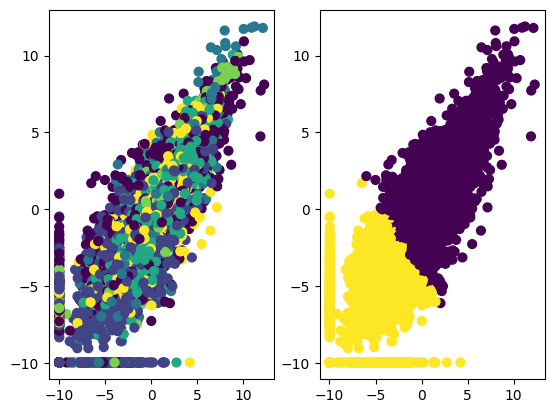

In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# visualize the dataset
_, ax = plt.subplots(1, 2)
ax[0].scatter(data[:, 0], data[:, 1], c=cl, s=40)
# plt.waitforbuttonpress()

# run spectral clustering - tune n_cl and sigma!!!
sigma = 0.09
n_cl = len(set(cl))
"""
# compute affinity matrix
distance_matrix = ((np.expand_dims(data, axis=0) - np.expand_dims(data, axis=1)) ** 2).sum(axis=2)
affinity_matrix = np.exp(-distance_matrix / (sigma ** 2) )

# compute degree matrix
degree_matrix = np.diag(affinity_matrix.sum(axis=1))

# compute laplacian
laplacian_matrix = degree_matrix - affinity_matrix

# compute eigenvalues and vectors (suggestion: np.linalg is your friend)
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)

# ensure we are not using complex numbers - you shouldn't btw
if eigenvalues.dtype == 'complex128':
    print("My dude, you got complex eigenvalues. Now I am not gonna break down, but you should totally give me higher sigmas (σ). (;")
    eigenvalues, eigenvectors = eigenvalues.real, eigenvectors.real

# sort eigenvalues and vectors
sorted_indices = np.argsort(eigenvalues)
eigenvalues, eigenvectors = eigenvalues[sorted_indices], eigenvectors[:, sorted_indices]

# SOLUTION A: Fiedler-vector solution
# - consider only the SECOND smallest eigenvector
# - threshold it at zero
# - return as labels
labels = eigenvectors[:, 1] > 0

# SOLUTION B: K-Means solution
# - consider eigenvectors up to the n_cl-th
# - use them as features instead of data for KMeans
# - You want to use sklearn's implementation (;
# - return KMeans' clusters
new_features = eigenvectors[:, 1:n_cl+1]    #non prendo il primo autovettore perchè è quello che considera un unico cluster
"""
labels = KMeans(n_clusters=2).fit_predict(data)

# visualize results
ax[1].scatter(data[:, 0], data[:, 1], c=labels, s=40)
plt.show()
#plt.savefig('kmeans_both_median.png')